## Initial setup for the Colab Notebook for HR4796 Models.   Please be sure you have run the DiskModels_Colab_Setup Google Colab notebook first (only needs to be run once) to download the needed files for the exercises.

#### Define Directories and install the radmc3dpy python module
In the next section of cells, you will confirm the download location and install the radmc3dpy python module in this Colab instance.  

"SSW2021/DiskModels" is the default install directory and you can leave that as-is or change it if you updated the directory in the Disk Models Setup Colab Notebook. Update the fill in box on the right below.  But a reminder that all DiskModel  Google Colab notebooks will need to updated if you have defined a different directory.

The exercises begin in the HR 4796 section.


In [2]:
# You will be prompted to sign in for the authorization key to access your Google account
#    Click on the "Go to this URL in  a browser"
#    Click on "Sign in" for the authorization
#    Copy the key (be sure to capture the full key - there may be a scroll bar) and paste the key in the text box and press the return key
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# If you update the directory in the box on the right, re-run this cell
diskmodel_dir = 'SSW2021/DiskModels' #@param {type:"string"}

In [4]:
# import os and sys to setup the directory environment
import sys
import os

# Confirm the directory location
# Google top level drive dir
drive_dir = "/content/drive/MyDrive/"

# Disk Model Path
diskmodel_path = os.path.join(drive_dir,diskmodel_dir)
hr4796_path = os.path.join(diskmodel_path, 'HR4796')
radmc3dpy_path = os.path.join(diskmodel_path, 'radmc3dPy')

# add radmc3dpy to PYTHONPATH
radmc3dpy_path = radmc3dpy_path+"/python/radmc3dPy"
os.chdir(radmc3dpy_path)
!python setup.py install 

# Change directory to HR4796
os.chdir(hr4796_path)


running install
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "radmc3dPy._bhmie" sources
f2py options: []
  adding 'build/src.linux-x86_64-3.7/build/src.linux-x86_64-3.7/radmc3dPy/fortranobject.c' to sources.
  adding 'build/src.linux-x86_64-3.7/build/src.linux-x86_64-3.7/radmc3dPy' to include_dirs.
build_src: building npy-pkg config files
running build_py
running build_ext
customize UnixCCompiler
customize UnixCCompiler using build_ext
get_default_fcompiler: matching types: '['gnu95', 'intel', 'lahey', 'pg', 'nv', 'absoft', 'nag', 'vast', 'compaq', 'intele', 'intelem', 'gnu', 'g95', 'pathf95', 'nagfor']'
customize Gnu95FCompiler
Found executable /usr/bin/gfortran
customize Gnu95FCompiler
customize Gnu95FCompiler using build_ext
running install_lib
creating /usr/local/l

# HR 4796

### Table of Contents:
* [Best-Fit Disk](#best-fit)
 * [Spectral Energy Distribution](#best-fit-SED)
 * [Images at Different Wavelengths](#best-fit-images)
* [Varying the Disk Radial Distance from the Star](#disk-radius)
 * [Spectral Energy Distribution](#radius-SED)
 * [Images of the Disk at 870 and 0.8 $\mu$m](#radius-images)
* [Varying the Dust Grain sizes](#grain-sizes)
 * [Spectral Energy Distribution](#grain-SED)
 * [Images of the Disk at 870 and 0.8 $\mu$m](#grain-images)

First we import some Python libraries:

In [5]:
from radmc3dPy import *
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits
import matplotlib.gridspec as gridspec

In [6]:
# Let's determine the current directory and store it in a variable
# (execute this cell only once at the beginning)
cwd = os.getcwd()
cwd

'/content/drive/My Drive/SSW2021/DiskModels/HR4796'

In [ ]:
# For Google colab, as long as you have set the diskmodel_dir to match your setup
#  then you are okay and no change needed here

#If the above directory is not the main directory for this object 
#(where the subdirectories "HR4796_Best_Fit", "HR4796_Varying_Distance",
#"HR4796_Varying_Grain_Size" , "HR4796_Varying_Star_Temperature" are), 
#set it below:

#cwd = 'My_Directory_for_HR4796'

## Best-Fit Disk <a class="anchor" id="best-fit"></a>

### Spectral Energy Distribution <a class="anchor" id="best-fit-SED"></a>

Reading wavelength_micron.inp


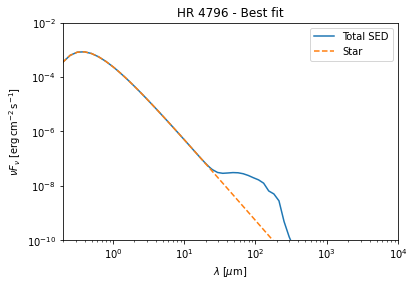

In [7]:
os.chdir(cwd+'/HR4796_Best_Fit')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Best_fit.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit')
plt.legend()

Note that in the plot above the total SED is plotted in blue, while the stellar SED (orange line) represents the stellar emission as it would appear without any circumstellar material. The SED that is actually observed is the "total SED".

### Images at Different Wavelengths <a class="anchor" id="best-fit-images"></a>

In [8]:
dpc=72.8  # Distance in parsec (for conversion to Jy/pixel in mm map)

In the plots below, you may change the range of values covered by the color scale, 
either by directly changing the vmax and vmin values in the "plotImage" command,
or you can also replace the vmax and vmin entirely by "maxlog=3", which means that 
Python will evaluate the best coloscale and cover 3 decades (since this is a 
logarithmic plot).

Reading HR4796_870um_Best_fit.out


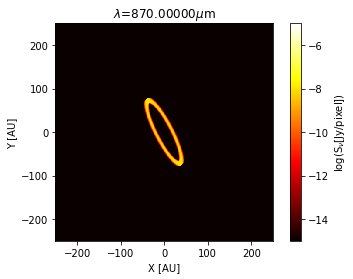

In [9]:
#870 microns: thermal dust emission (mm map, in Jy)

os.chdir(cwd+'/HR4796_Best_Fit')
image = readImage('HR4796_870um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-15.,vmax=-5.,bunit='jy/pixel',dpc=dpc,cmap='hot')
plt.title('HR 4796 - 870 $\mu \mathrm{m}$ - Best fit')
plt.close()

Reading HR4796_100um_Best_fit.out


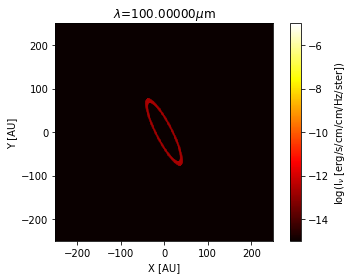

In [10]:
#100 microns: far-IR emission

os.chdir(cwd+'/HR4796_Best_Fit')
image = readImage('HR4796_100um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_100um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-15.,vmax=-5.,bunit='inu',cmap='hot')
plt.title('HR 4796 - 100 $\mu \mathrm{m}$ - Best fit')
plt.close()

Reading HR4796_10um_Best_fit.out


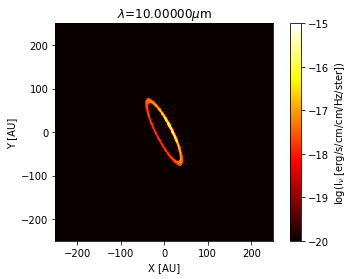

In [11]:
#10 microns: mid-IR emission

os.chdir(cwd+'/HR4796_Best_Fit')
image = readImage('HR4796_10um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_10um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-20.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR 4796 - 10 $\mu \mathrm{m}$ - Best fit')
plt.close()

Reading HR4796_08um_Best_fit.out


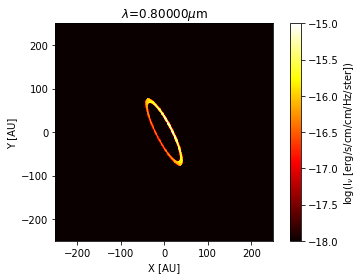

In [12]:
# 0.8 microns: scattered light

os.chdir(cwd+'/HR4796_Best_Fit')
image = readImage('HR4796_08um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR 4796 - 0.8 $\mu \mathrm{m}$ - Best fit')
plt.close()

## Varying the Disk Radial Distance from the Star <a class="anchor" id="disk-radius"></a>

### Spectral Energy Distribution <a class="anchor" id="radius-SED"></a>

Reading wavelength_micron.inp


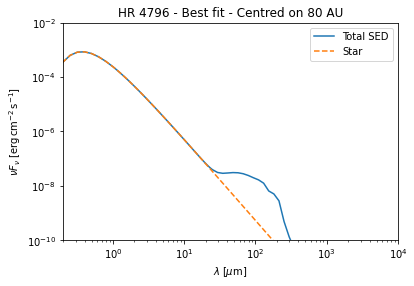

In [13]:
#Best fit disk - Centered at 80 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Best_fit.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 80 AU')
plt.legend()

The previous cell contains the code to plot the SED model for a disk which is centered at a radial distance of 80 AU (best fit). Note that the total SED is plotted in blue, while the stellar SED (orange line) represents the stellar emission as it would appear without any circumstellar material. The SED that is actually observed is the "total SED".

Now you should plot the SEDs calculated for different disk radial distances. The file names are:

 - Disk radisu = 60 AU:
  - HR4796_SED_Ring_60AU_centred.out
 - Disk radisu = 40 AU:
  - HR4796_SED_Ring_40AU_centred.out
 - Disk radisu = 20 AU:
  - HR4796_SED_Ring_20AU_centred.out
 - Disk radisu = 10 AU:
  - HR4796_SED_Ring_10AU_centred.out
 - Disk radisu = 7.5 AU: 
  - HR4796_SED_Ring_7.5AU_centred.out

Use the cell below (and add your own cells by using "Insert" --> "Insert Cell Below" from the menu above) to add the additional SED plots. (For Google Colab, "Insert" --> "Code cell")

Reading wavelength_micron.inp


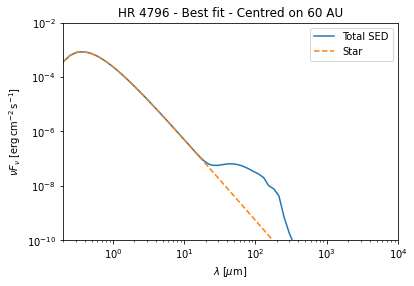

In [14]:
#Best fit disk - Centered at 60 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Ring_60AU_centred.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 60 AU')
plt.legend()

Reading wavelength_micron.inp


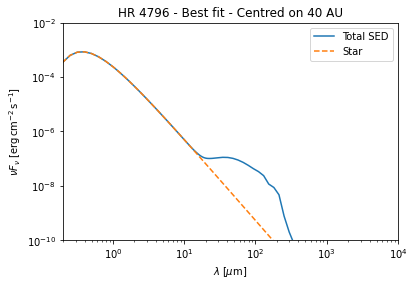

In [15]:
#Best fit disk - Centered at 40 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Ring_40AU_centred.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 40 AU')
plt.legend()

Reading wavelength_micron.inp


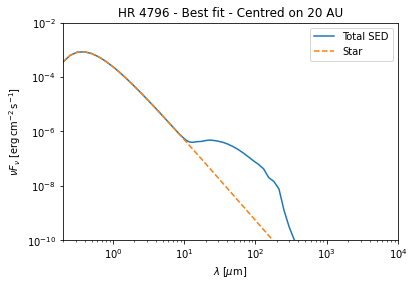

In [16]:
#Best fit disk - Centered at 20 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Ring_20AU_centred.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 20 AU')
plt.legend()

Reading wavelength_micron.inp


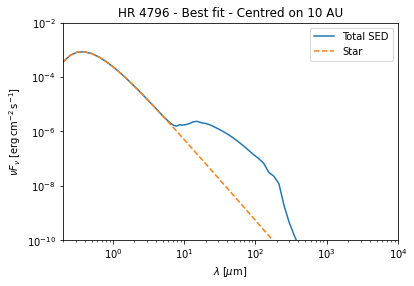

In [17]:
#Best fit disk - Centered at 10 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Ring_10AU_centred.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 10 AU')
plt.legend()

Reading wavelength_micron.inp


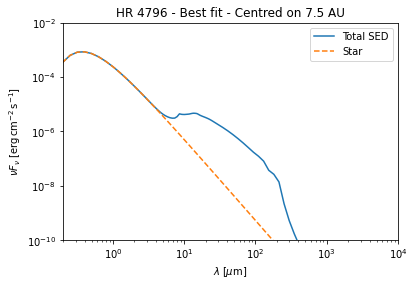

In [18]:
#Best fit disk - Centered at 7.5 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Ring_7.5AU_centred.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Best fit - Centred on 7.5 AU')
plt.legend()

Reading wavelength_micron.inp


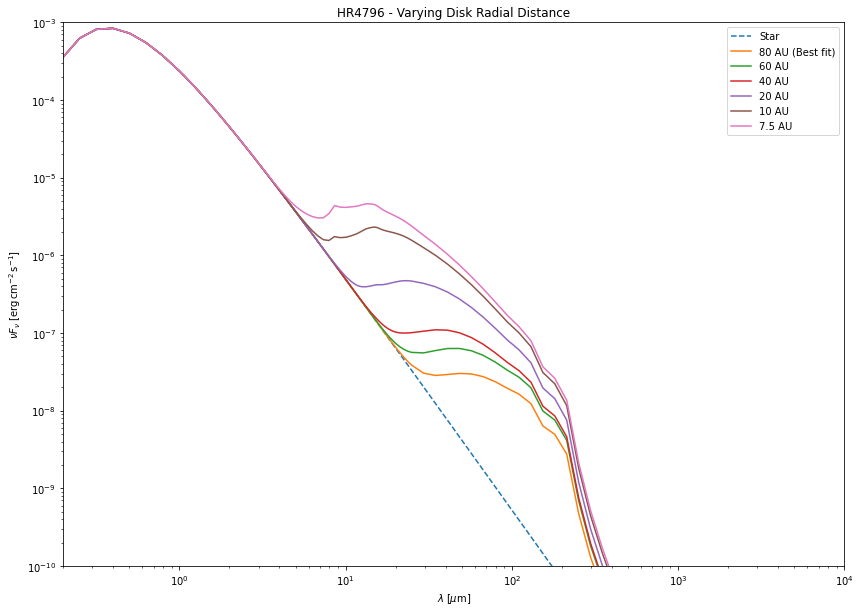

In [20]:
#And now let's plot a SED showing all the disk radial distances explored in a single plot

os.chdir(cwd+'/HR4796_Varying_Distance')
fig  = plt.figure(figsize=(14,10))
#Read the SED of the star - Automatically reads the files stars.inp
star  = readStars('stars_10000K.inp')
#Read the individual SED files (lambda,flux)
s1     = readSpectrum('HR4796_SED_Best_fit.out')
s2     = readSpectrum('HR4796_SED_Ring_60AU_centred.out')
s3     = readSpectrum('HR4796_SED_Ring_40AU_centred.out')
s4     = readSpectrum('HR4796_SED_Ring_20AU_centred.out')
s5     = readSpectrum('HR4796_SED_Ring_10AU_centred.out')
s6     = readSpectrum('HR4796_SED_Ring_7.5AU_centred.out')
#Read the wavelengths at which the SED was computed. They are the same across all the SEDs
# we are going to display, so we can take them from any one of the SEDs
lam   = s1[:,0]
nu    = 1e4*cc/lam  #This computes the corresponding frequencies
#Now plotting the star's SED
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
#Now extracting, treating, and plotting individual SEDs
fnu1   = s1[:,1]      #These are the actual fluxes at a given wavelength/frequency
nufnu1 = nu*fnu1      #These are multiplied by their corresponding frequency. See documentation.
plt.loglog(lam,nufnu1,label='80 AU (Best fit)')
#
lam   = s2[:,0]
nu    = 1e4*cc/lam
fnu2   = s2[:,1]
nufnu2 = nu*fnu2
plt.loglog(lam,nufnu2,label='60 AU')
#
fnu3   = s3[:,1]
nufnu3 = nu*fnu3
plt.loglog(lam,nufnu3,label='40 AU')
#
fnu4   = s4[:,1]
nufnu4 = nu*fnu4
plt.loglog(lam,nufnu4,label='20 AU')
#
fnu5   = s5[:,1]
nufnu5 = nu*fnu5
plt.loglog(lam,nufnu5,label='10 AU')
#
lam   = s6[:,0]
nu    = 1e4*cc/lam
fnu6   = s6[:,1]
nufnu6 = nu*fnu6
plt.loglog(lam,nufnu6,label='7.5 AU')
#
plt.axis([2e-1, 1e4, 1e-10, 1e-3])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR4796 - Varying Disk Radial Distance')
plt.legend()

### Images of the Disk at 870 $\mu$m (thermal emission) and 0.8 $\mu$m (scattered light) <a class="anchor" id="radius-images"></a>

In [21]:
dpc=72.8  # Distance in parsec (for conversion to Jy/pixel in mm map)

Reading HR4796_870um_Best_fit.out


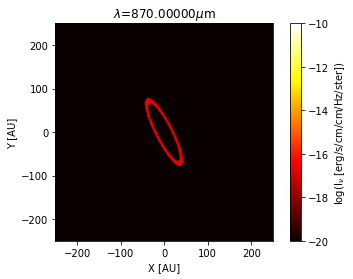

Reading HR4796_08um_Best_fit.out


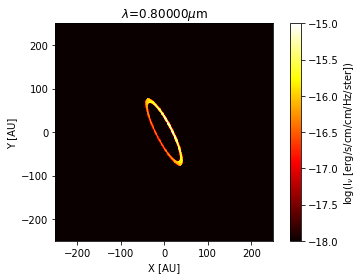

In [22]:
# Best fit disk - Centered at 80 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
image = readImage('HR4796_870um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Best fit - Centred on 80 AU')
plt.close()

image = readImage('HR4796_08um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Best fit - Centred on 80 AU')
plt.close()

The previous cell contains the code to plot the model image at 870 $\mu$m and 0.8 $\mu$m for a disk centered at a radial distance of 80 AU (best fit). Now you should plot the images calculated for different disk radial distances. The file names are:

 - Disk radisu = 60 AU:
  - HR4796_870um_Ring_60AU_centred.out and HR4796_08um_Ring_60AU_centred.out
 - Disk radisu = 40 AU:
  - HR4796_870um_Ring_40AU_centred.out and HR4796_08um_Ring_40AU_centred.out
 - Disk radisu = 20 AU:
  - HR4796_870um_Ring_20AU_centred.out and HR4796_08um_Ring_20AU_centred.out
 - Disk radisu = 10 AU:
  - HR4796_870um_Ring_10AU_centred.out and HR4796_08um_Ring_10AU_centred.out
 - Disk radisu = 7.5 AU: 
  - HR4796_870um_Ring_7.5AU_centred.out and HR4796_08um_Ring_7.5AU_centred.out

Use the cell below (and add your own cells as above) to add the additional model images.

You may change the range of values covered by the colors cale, either by
directly changing the vmax and vmin values in the "plotImage" command,
or you can also replace the vmax and vmin entirely by "maxlog=3", which means
that Python will evaluate the best color scale and cover 3 decades (since this
is a logarithmic plot).

Reading HR4796_870um_Ring_60AU_centred.out


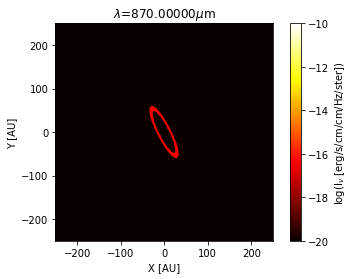

Reading HR4796_08um_Ring_60AU_centred.out


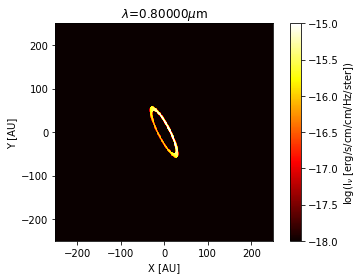

In [23]:
# Best fit disk - Centered at 60 AU

os.chdir(cwd+'/HR4796_Varying_Distance')
image = readImage('HR4796_870um_Ring_60AU_centred.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Centred on 60 AU')
plt.close()

image = readImage('HR4796_08um_Ring_60AU_centred.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Best_fit.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Centred on 60 AU')
plt.close()

Reading HR4796_08um_Ring_7.5AU_centred.out


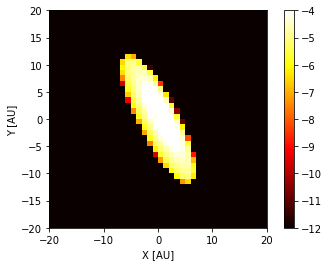

In [24]:
# Here are plotting commands if you want to zoom in on the disk
# (useful for the small disk sizes):

os.chdir(cwd+'/HR4796_Varying_Distance')
image = readImage('HR4796_08um_Ring_7.5AU_centred.out')

#Save the image as a fits file centred on the object coordinates
# (first check whether file already exists)
if os.path.exists('HR4796_08um_Ring_7.5AU_centred.fits')==False:
    image.writeFits('HR4796_08um_Ring_7.5AU_centred.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

image_data = fits.getdata('HR4796_08um_Ring_7.5AU_centred.fits',ext=0)
use_image = np.squeeze(image_data)

clipmin = np.log10(use_image[use_image > 0.].min())
use_image = np.log10(use_image.clip(1e-90))
use_image = use_image.clip(clipmin,use_image.max())
x = image.x / nc.au
y = image.y / nc.au
ext = (x[0], x[image.nx - 1], y[0], y[image.ny - 1])

plt.figure()

# Here is where you can adjust the axes values:
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.xlabel('X [AU]')
plt.ylabel('Y [AU]')
plt.imshow(use_image, vmax=-4,vmin=-12,cmap='hot', origin='lower',extent=ext)
plt.colorbar()
plt.show()
plt.close()

## Varying the Dust Grain sizes <a class="anchor" id="grain-sizes"></a>

### Spectral Energy Distribution <a class="anchor" id="grain-SED"></a>

Reading wavelength_micron.inp


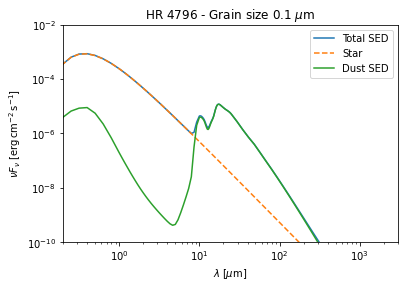

In [25]:
#Grain size 0.1 micron

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Grain_0.1microns.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
fnudust = fnu-star.fnustar[:,0]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.loglog(lam,nu*fnudust,label='Dust SED')
plt.axis([2e-1, 3e3, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Grain size 0.1 $\mu \mathrm{m}$')
plt.legend()

The previous cell contains the code to plot the SED model for a dust grain size of 0.1 $\mu$m. Note that the total SED is plotted in blue, while the stellar SED (orange line) represents the stellar emission as it would appear without any circumstellar material. The SED that is actually observed is the "total SED".

Now you should plot the SEDs calculated for different grain sizes. The file names are:

 - Grain size = 1 $\mu$m:
  - HR4796_SED_Grain_1microns.out
 - Grain size = 10 $\mu$m:
  - HR4796_SED_Grain_10microns.out
 - Grain size = 30 $\mu$m (best fit): 
  - HR4796_SED_Best_fit.out
 - Grain size = 100 $\mu$m:
  - HR4796_SED_Grain_100microns.out
  
Use the cell below (and add your own cells as above) to add the additional SED plots.

Reading wavelength_micron.inp


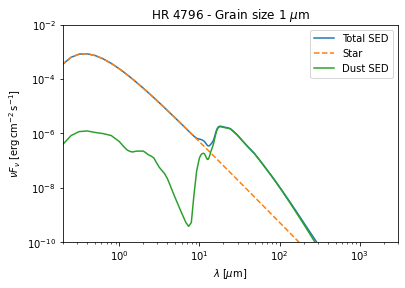

In [26]:
#Grain size 0.1 micron

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
fig  = plt.figure()
s     = readSpectrum('HR4796_SED_Grain_1microns.out')
star  = readStars('stars_10000K.inp')
lam   = s[:,0]
nu    = 1e4*cc/lam
fnu   = s[:,1]
fnudust = fnu-star.fnustar[:,0]
nufnu = nu*fnu
plt.loglog(lam,nufnu,label='Total SED')
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.loglog(lam,nu*fnudust,label='Dust SED')
plt.axis([2e-1, 3e3, 1e-10, 1e-2])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Grain size 1 $\mu \mathrm{m}$')
plt.legend()

Reading wavelength_micron.inp


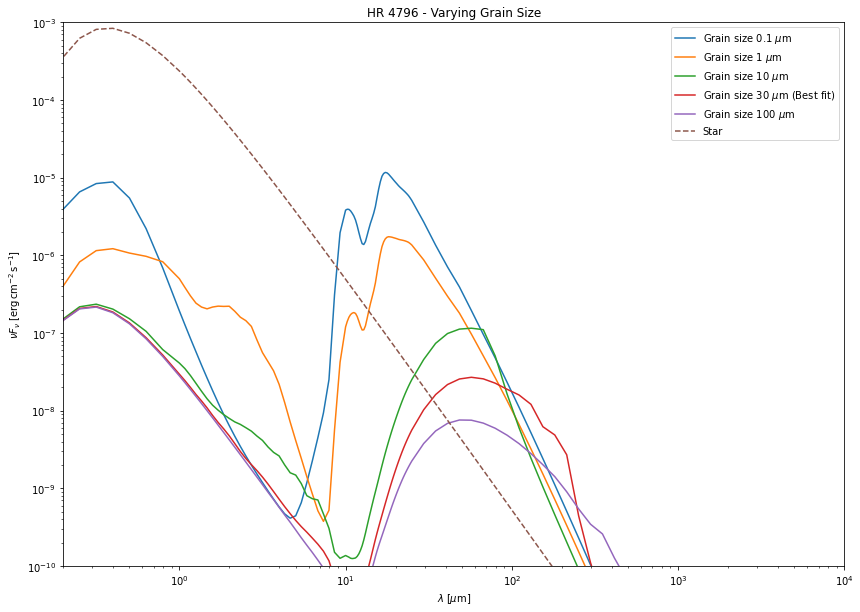

In [27]:
#And now let's plot a SED showing all the dust grain sizes explored in a single plot

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
fig  = plt.figure(figsize=(14,10))
#Read the SED of the star - Automatically reads the files stars.inp
star  = readStars('stars_10000K.inp')
#Read the individual SED files (lambda,flux)
s1     = readSpectrum('HR4796_SED_Grain_0.1microns.out')
s2     = readSpectrum('HR4796_SED_Grain_1microns.out')
s3     = readSpectrum('HR4796_SED_Grain_10microns.out')
s4     = readSpectrum('HR4796_SED_Best_fit.out')
s5     = readSpectrum('HR4796_SED_Grain_100microns.out')
#Read the wavelengths at which the SED was computed. They are the same across all the SEDs
# we are going to display, so we can take them from any one of the SEDs
lam   = s1[:,0]
nu    = 1e4*cc/lam  #This computes the corresponding frequencies
#Now extracting, treating, and plotting individual SEDs
fnu1   = s1[:,1]      #These are the actual fluxes at a given wavelength/frequency
nufnu1 = nu*fnu1      #These are multiplied by their corresponding frequency. See documentation.
fnudust1 = fnu1-star.fnustar[:,0]
#plt.loglog(lam,nufnu1,label='Grain size 0.1 $\mu \mathrm{m}$')
plt.loglog(lam,nu*fnudust1,label='Grain size 0.1 $\mu \mathrm{m}$')
#
fnu2   = s2[:,1]
nufnu2 = nu*fnu2
fnudust2 = fnu2-star.fnustar[:,0]
#plt.loglog(lam,nufnu2,label='Grain size 1 $\mu \mathrm{m}$')
plt.loglog(lam,nu*fnudust2,label='Grain size 1 $\mu \mathrm{m}$')
#
fnu3   = s3[:,1]
nufnu3 = nu*fnu3
fnudust3 = fnu3-star.fnustar[:,0]
#plt.loglog(lam,nufnu3,label='Grain size 10 $\mu \mathrm{m}$')
plt.loglog(lam,nu*fnudust3,label='Grain size 10 $\mu \mathrm{m}$')
#
fnu4   = s4[:,1]
nufnu4 = nu*fnu4
fnudust4 = fnu4-star.fnustar[:,0]
#plt.loglog(lam,nufnu4,label='Grain size 30 $\mu \mathrm{m}$')
plt.loglog(lam,nu*fnudust4,label='Grain size 30 $\mu \mathrm{m}$ (Best fit)')
#
fnu5   = s5[:,1]
nufnu5 = nu*fnu5
fnudust5 = fnu5-star.fnustar[:,0]
#plt.loglog(lam,nufnu5,label='Grain size 100 $\mu \mathrm{m}$')
plt.loglog(lam,nu*fnudust5,label='Grain size 100 $\mu \mathrm{m}$')
#
plt.loglog(lam,nu*star.fnustar[:,0],label='Star',linestyle='dashed')
plt.axis([2e-1, 1e4, 1e-10, 1e-3])
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')
plt.title('HR 4796 - Varying Grain Size')
plt.legend()

### Images of the Disk at 870 $\mu$m (thermal emission) and 0.8 $\mu$m (scattered light)  <a class="anchor" id="grain-images"></a>

In [28]:
dpc=72.8  # Distance in parsec (for conversion to Jy/pixel in mm map)

Reading HR4796_870um_Grain_0.1microns.out


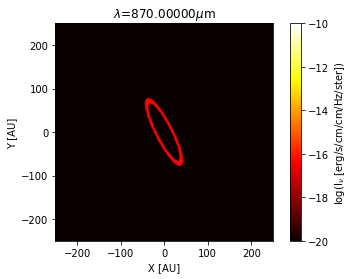

Reading HR4796_08um_Grain_0.1microns.out


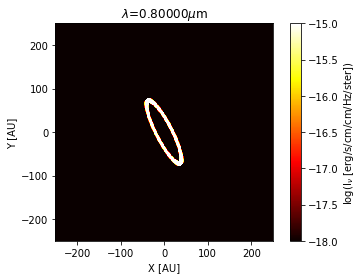

In [29]:
#  Grains 0.1 microns

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
image = readImage('HR4796_870um_Grain_0.1microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Grains 0.1 microns')
plt.close()

image = readImage('HR4796_08um_Grain_0.1microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Grains 0.1 microns')
plt.close()

The previous cell contains the code to plot the model image at 870 $\mu$m and 0.8 $\mu$m for a dust grain size of 0.1 $\mu$m. Now you should plot the images calculated for different grain sizes. The file names are:

 - Grain size = 1 $\mu$m:
  - HR4796_870um_Grain_1microns.out and HR4796_08um_Grain_1microns.out
 - Grain size = 10 $\mu$m:
  - HR4796_870um_Grain_10microns.out and HR4796_08um_Grain_10microns.out
 - Grain size = 30 $\mu$m (best fit): 
  - HR4796_870um_Best_fit.out and HR4796_08um_Best_fit.out
 - Grain size = 100 $\mu$m:
  - HR4796_870um_Grain_100microns.out and HR4796_08um_Grain_100microns.out


Use the cell below (and add your own cells as above) to add the model images.

You may change the range of values covered by the colors cale, either by
directly changing the vmax and vmin values in the "plotImage" command,
or you can also replace the vmax and vmin entirely by "maxlog=3", which means
that Python will evaluate the best color scale and cover 3 decades (since this
is a logarithmic plot).

Reading HR4796_870um_Grain_1microns.out


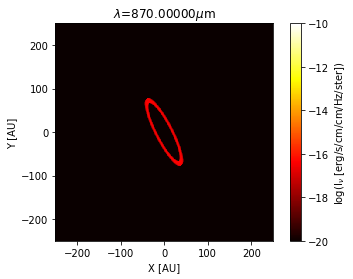

Reading HR4796_08um_Grain_1microns.out


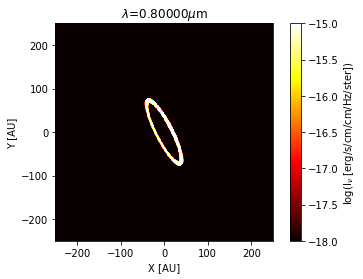

In [30]:
#  Grains 1 microns

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
image = readImage('HR4796_870um_Grain_1microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Grains 1 microns')
plt.close()

image = readImage('HR4796_08um_Grain_1microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Grains 1 microns')
plt.close()

Reading HR4796_870um_Grain_10microns.out


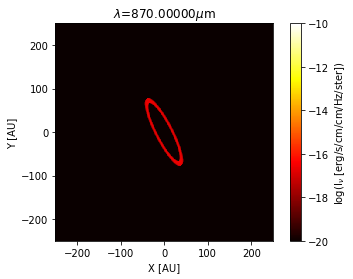

Reading HR4796_08um_Grain_10microns.out


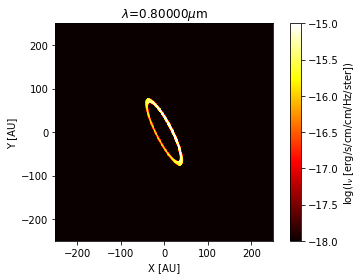

In [31]:
#  Grains 10 microns

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
image = readImage('HR4796_870um_Grain_10microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Grains 10 microns')
plt.close()

image = readImage('HR4796_08um_Grain_10microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Grains 10 microns')
plt.close()

Reading HR4796_870um_Best_fit.out


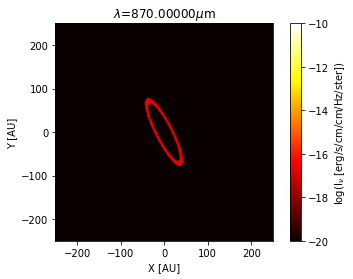

Reading HR4796_08um_Best_fit.out


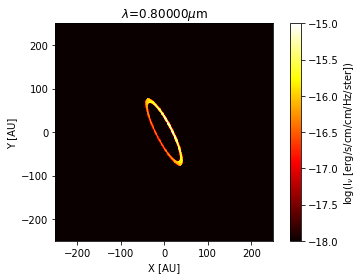

In [33]:
#  Grains 30 microns

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
image = readImage('HR4796_870um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Grains 30 microns')
plt.close()

image = readImage('HR4796_08um_Best_fit.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Grains 30 microns')
plt.close()

Reading HR4796_870um_Grain_100microns.out


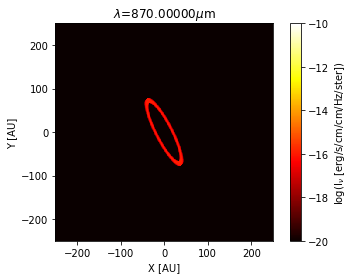

Reading HR4796_08um_Grain_100microns.out


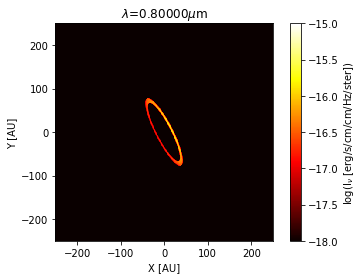

In [34]:
#  Grains 100 microns

os.chdir(cwd+'/HR4796_Varying_Grain_Size')
image = readImage('HR4796_870um_Grain_100microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_870um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmax=-10.,vmin=-20.,bunit='inu',cmap='hot')
plt.title('HR4796 - 870 $\mu \mathrm{m}$ - Grains 100 microns')
plt.close()

image = readImage('HR4796_08um_Grain_100microns.out')

#Save the image as a fits file centred on the object coordinates
#image.writeFits('HR4796_08um_Grain_0.1microns.fits', dpc=72.8 , coord = '12h36m01s -39d52m10s')

fig = plt.figure()
plotImage(image,au=True,log=True,vmin=-18.,vmax=-15.,bunit='inu',cmap='hot')
plt.title('HR4796 - 0.8 $\mu \mathrm{m}$ - Grains 100 microns')
plt.close()

Now that you have finished exploring the SEDs and images of HR 4796, you can go to this Google form and answer a few questions: https://forms.gle/oQvgbGinh8QvzZaK6